## TP6

In [1]:
import cv2 as cv
import time
import matplotlib.pyplot as plt

In [2]:
# Leer los clasificadores pre-entrenados
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')
smile_cascade = cv.CascadeClassifier('haarcascade_smile.xml')

In [3]:
def haar_detect(img, gray):
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)#, minSize= (100,130),maxSize=(200,400))
    # Recorrer las caras encontradas
    for (x,y,w,h) in faces:
        cv.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
        # Definir las ROIs en la imagen gris y color
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = img[y:y+h, x:x+w] 
        
        # Para cada rostro hallado le buscamos los ojos
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 10)
        # En los ojos hallados les dibujamos rectángulos azules
        for (ex,ey,ew,eh) in eyes:
            cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
            
        # Para cada rostro hallado le buscamos la sonriza
        smile = smile_cascade.detectMultiScale(roi_gray, 1.5, 15)
        # En las sonrizas hallados les dibujamos rectángulos amarillos
        for (sx,sy,sw,sh) in smile:
            cv.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,255,255),2)
           
    cv.imshow('img',img)

## Version desde imagen

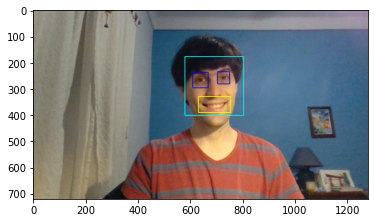

In [11]:
img = cv.imread('hernan.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.equalizeHist(gray)
haar_detect(img, gray)
cv.imwrite("salida.jpg",img)
cv.waitKey(50)
time.sleep(10) 
cv.destroyAllWindows()
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

# Versión con cámara

In [6]:
camera = cv.VideoCapture(0)
            
while(1):
    ret ,frame = camera.read()
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    gray = cv.equalizeHist(gray)
    
    haar_detect(frame, gray)
    
    if cv.waitKey(33) == ord('e'):
        print("finish")
        break
        
cv.destroyAllWindows()
camera.release()

finish
